In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('../pipeline')
%load_ext autoreload
%autoreload 2

In [3]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')

In [4]:
data = pd.concat([df_train, df_test], axis=0, sort=False )

In [5]:
data = data.fillna(-1)

In [6]:
data['paid_tickets'] = data.field15 - data.field9

In [7]:
count = dict(data['userid'].value_counts())
data['count'] = data['userid'].apply(lambda x: count[x])

In [8]:
data['count'].value_counts().sort_index()

1      259504
2      138314
3       70359
4       41968
5       26210
        ...  
198       198
222       222
310       310
363       363
756       756
Name: count, Length: 114, dtype: int64

In [9]:
data['oneWay'] = 0
idx= data[data.field15 % 2 == 1 ].index
data.loc[idx,'oneWay'] = 1

In [11]:
count

{'88a595f6f7754f656b33cca2c6addcb9c659c30bad00656779378af80209912a': 756,
 'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52': 363,
 'd4017f49f9e5cebdefabef5714f138ea0fc72410d19ac9997d416dc96dc01f23': 310,
 '98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b': 222,
 '2350f28919b7b4161f4e22c491cac8d5ae5347c4f52130b922651fbbb4f7381c': 198,
 'c2d39c54936961e415d536315954cf31d4a506334f65dfe96705297ca4d11a60': 193,
 'a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4': 185,
 '739eafb20f821b94d1d22146706a6c4d0375de292cd21ba3b6ba3278dc54fc93': 177,
 '6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67': 177,
 '350bc1455fa1adeef3346b956f87e23252b751efdbdec5b81d40fc8f4e5c2d2a': 167,
 '38188de7f244abad2947d65f588a7ea7818f465d9a63871fdf7fa2444318e7e1': 161,
 '4ff6d90fa7505838ff071e9a9e01208f5dfd3f5f237c74ff2e62c85a42522402': 157,
 '13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa': 149,
 'e139cfdfd8ccc2813af314294b72bcf5b2c0

In [12]:
top_users = data[data['count']>100]['userid'].value_counts()

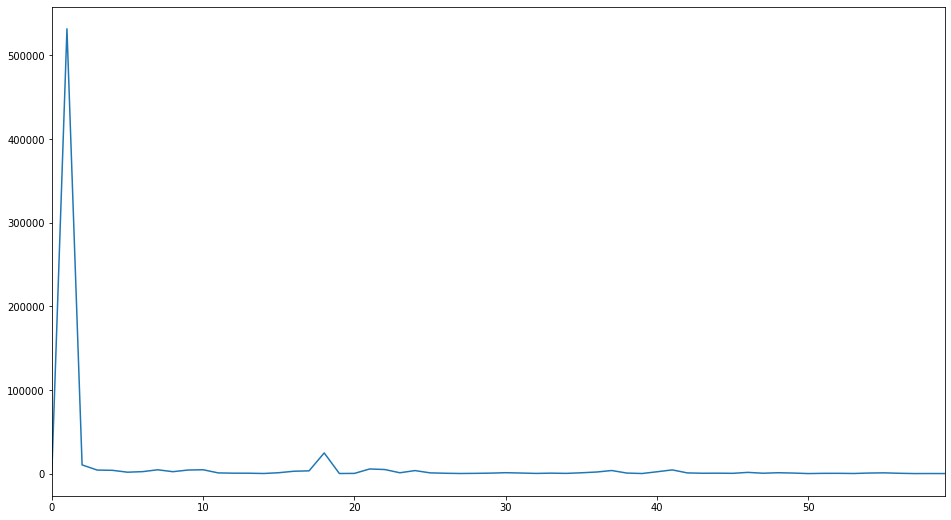

In [15]:
plt.figure(figsize=(16,9))
data.field25.value_counts().sort_index()[:60].plot()

In [18]:
data18 = data[data.field25==18]
data1 = data[data.field25==1]

In [27]:
data18.field7.value_counts()

2    24667
Name: field7, dtype: int64

c:\python36\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
c:\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package s

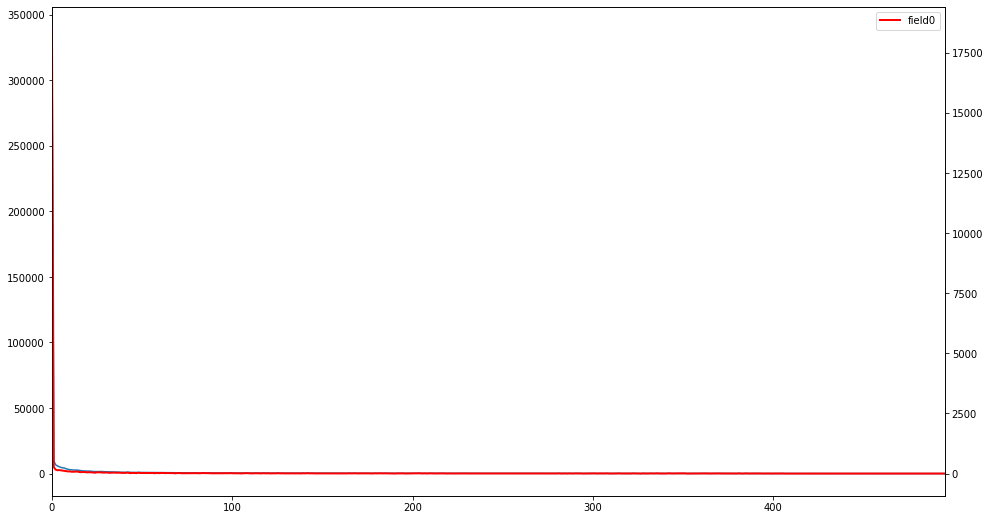

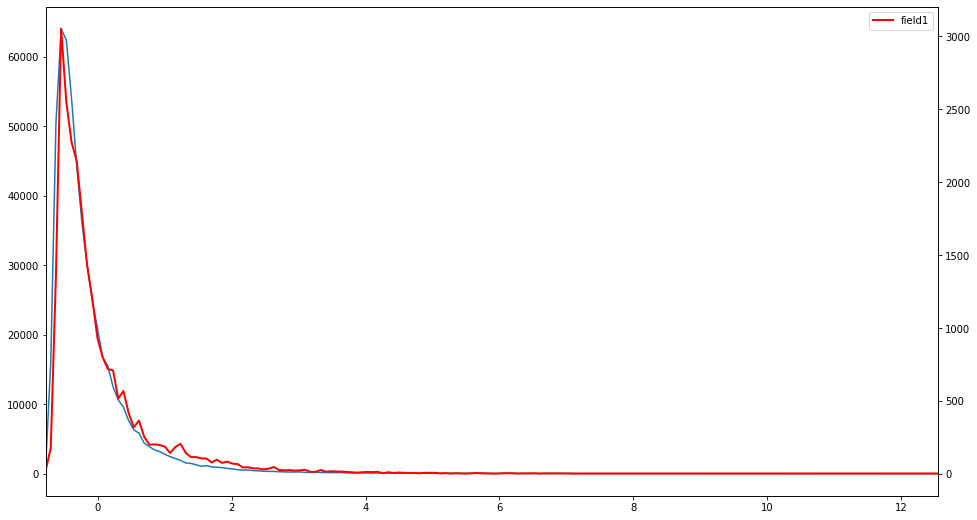

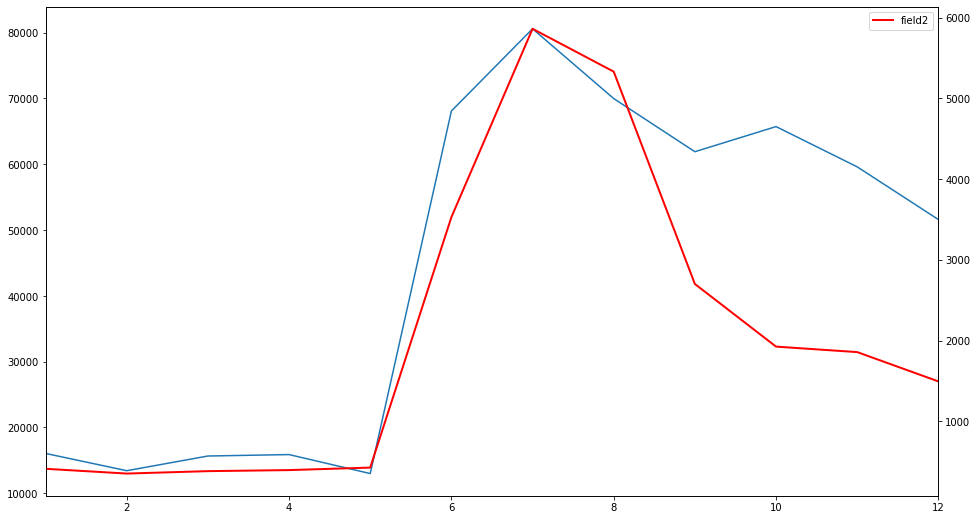

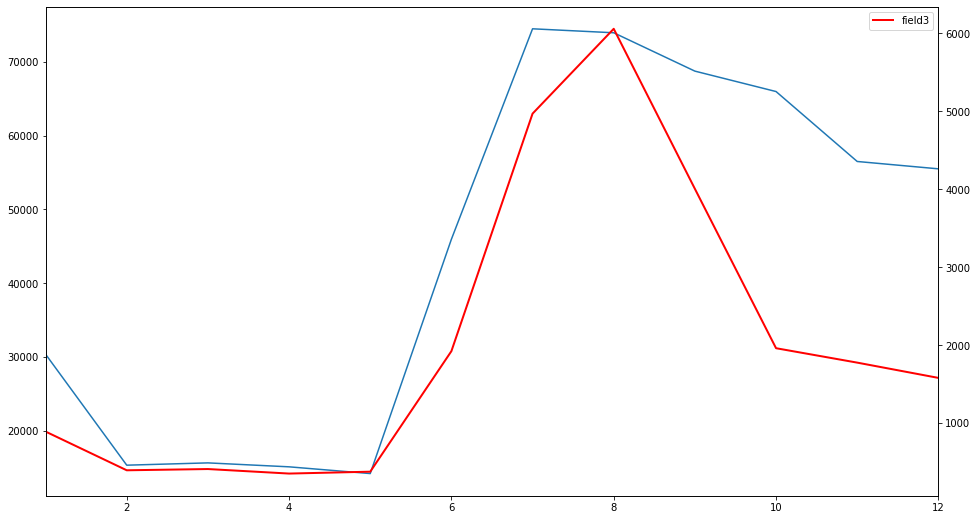

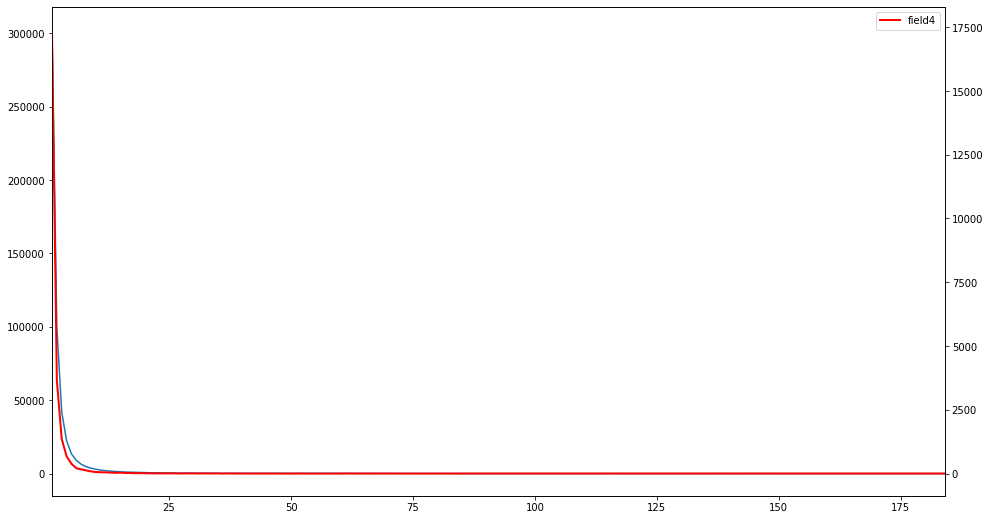

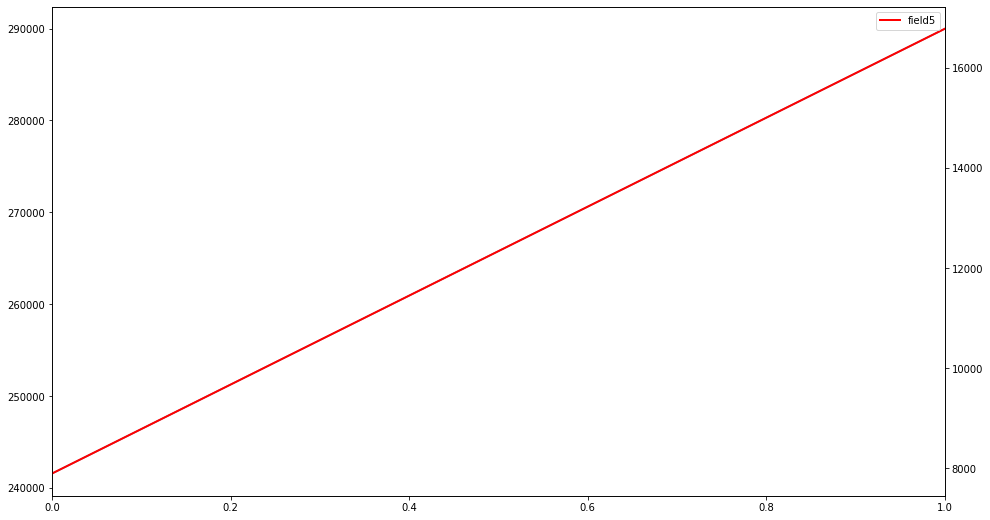

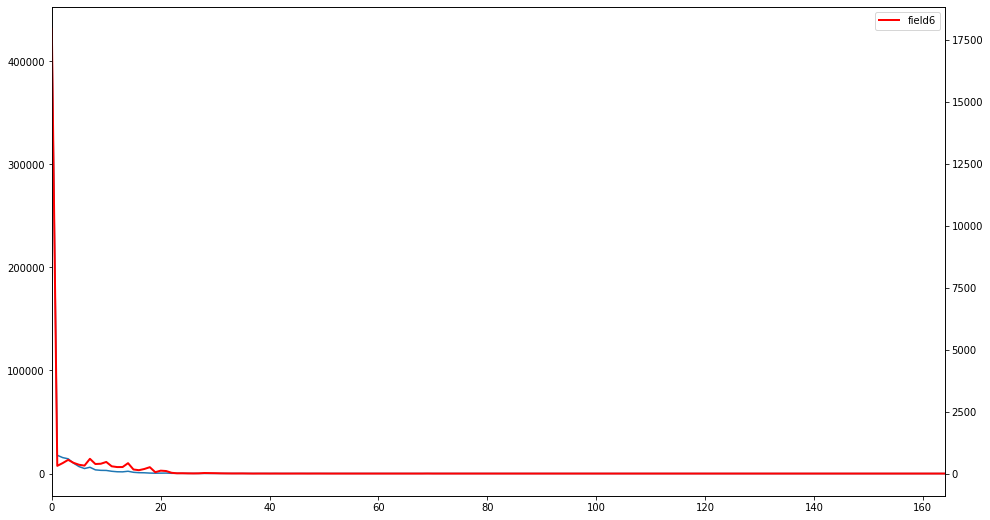

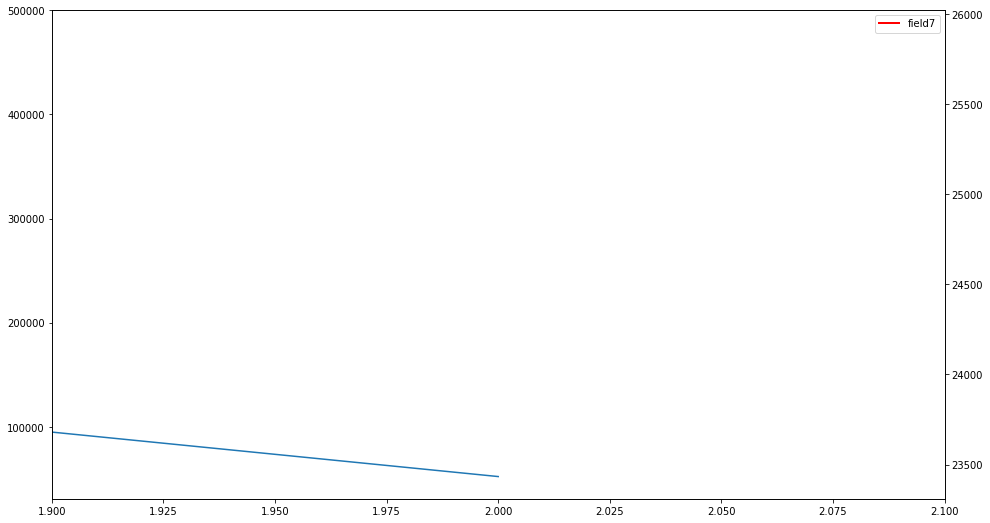

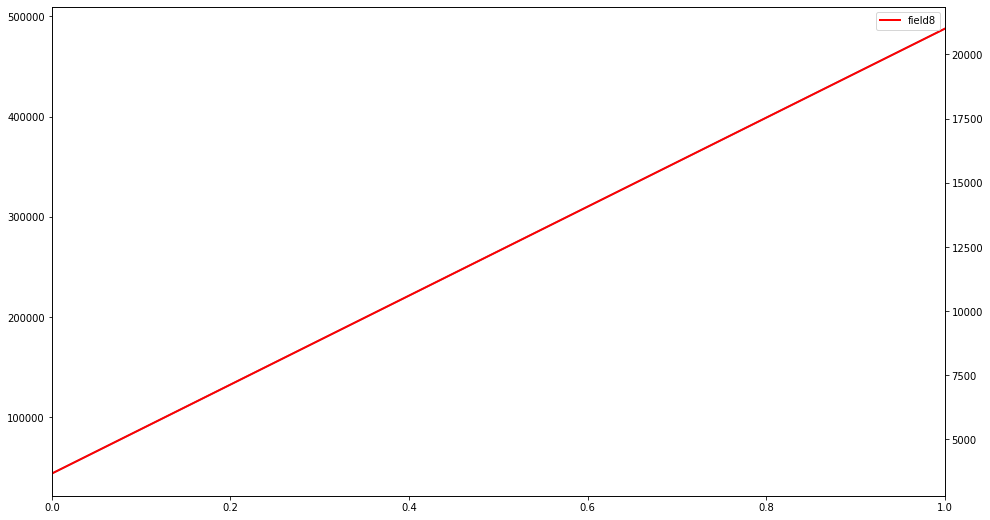

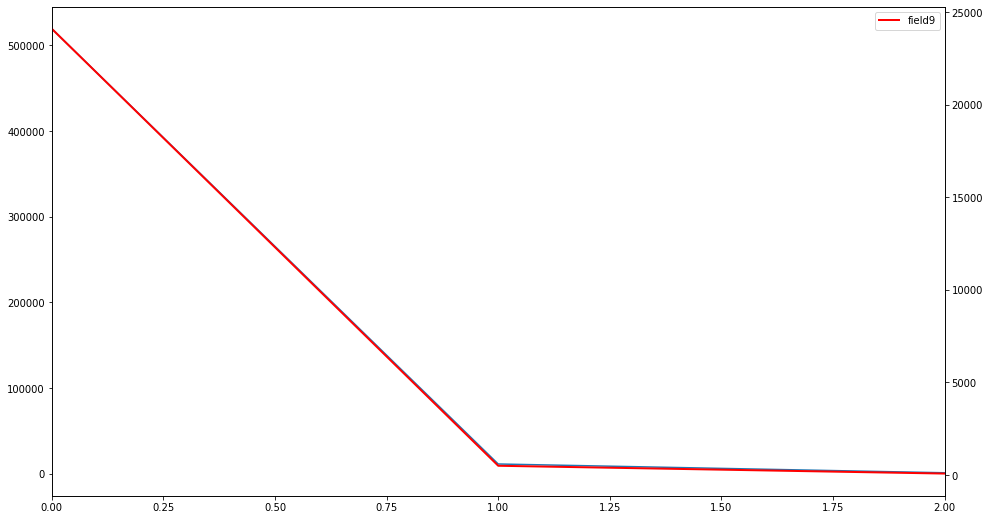

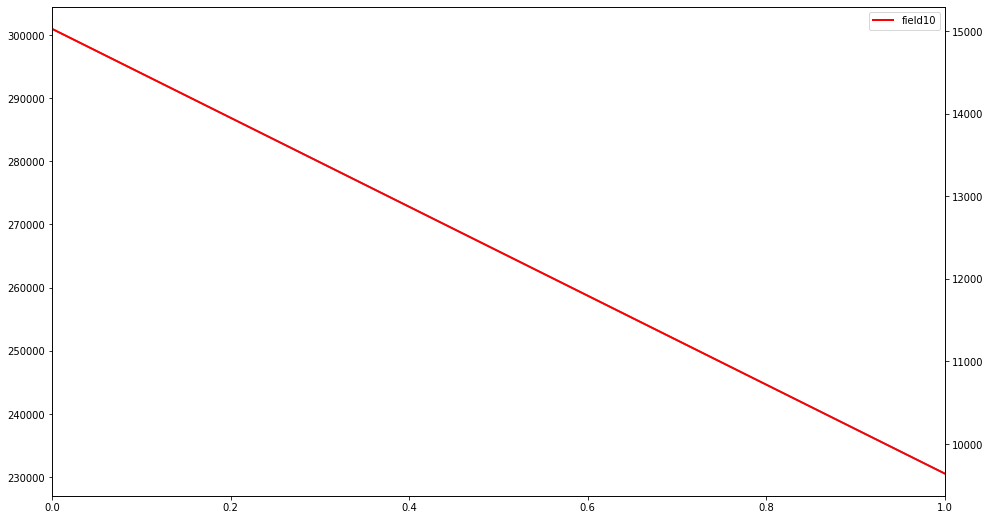

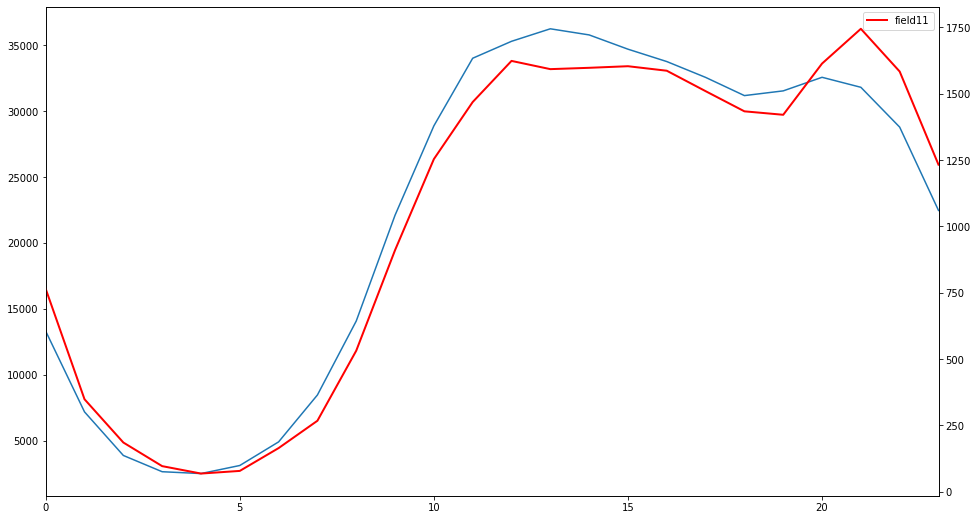

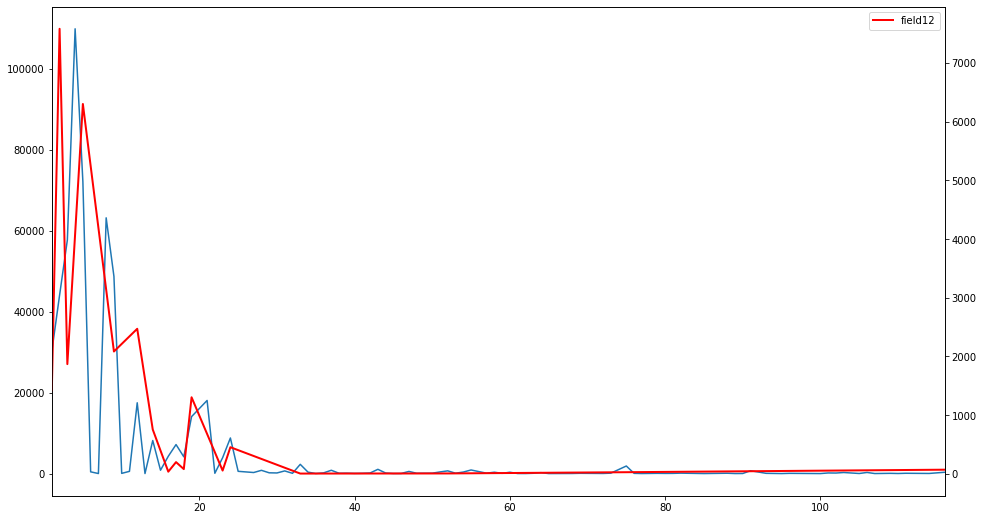

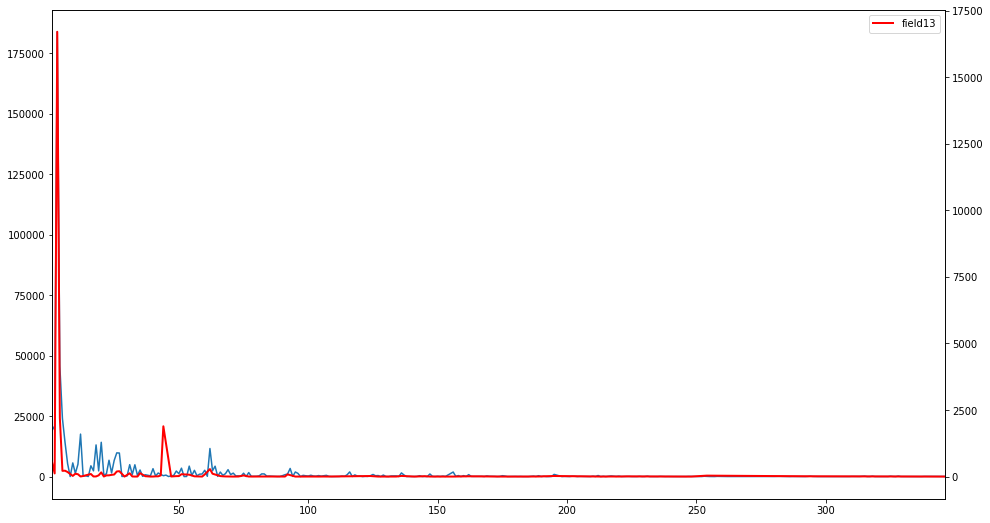

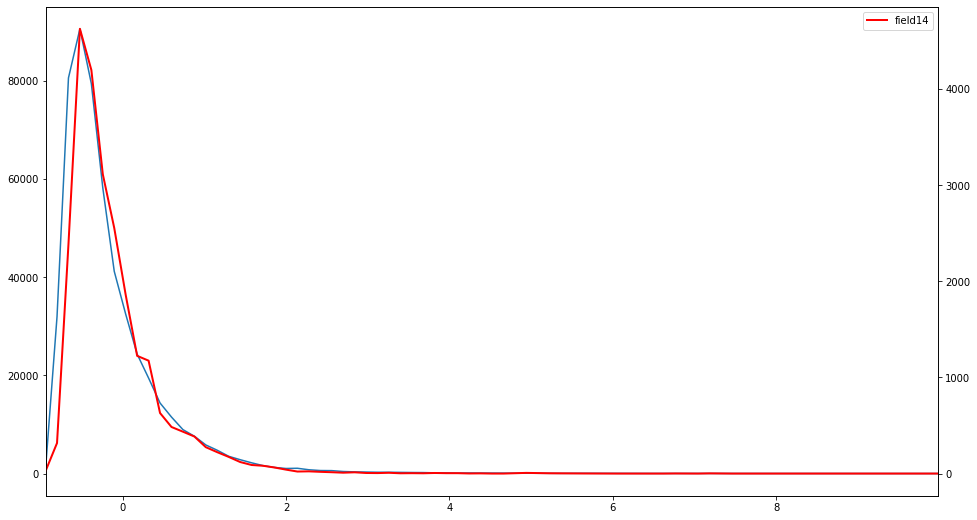

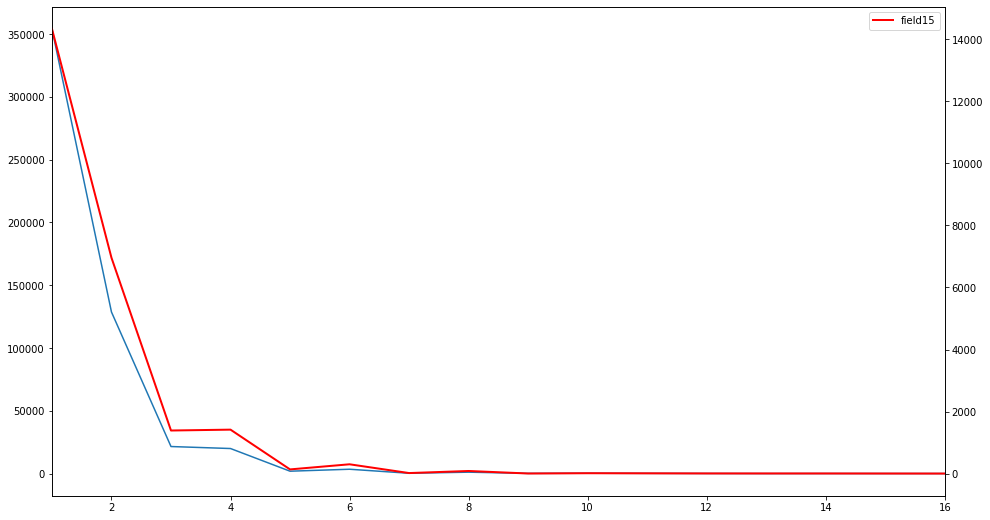

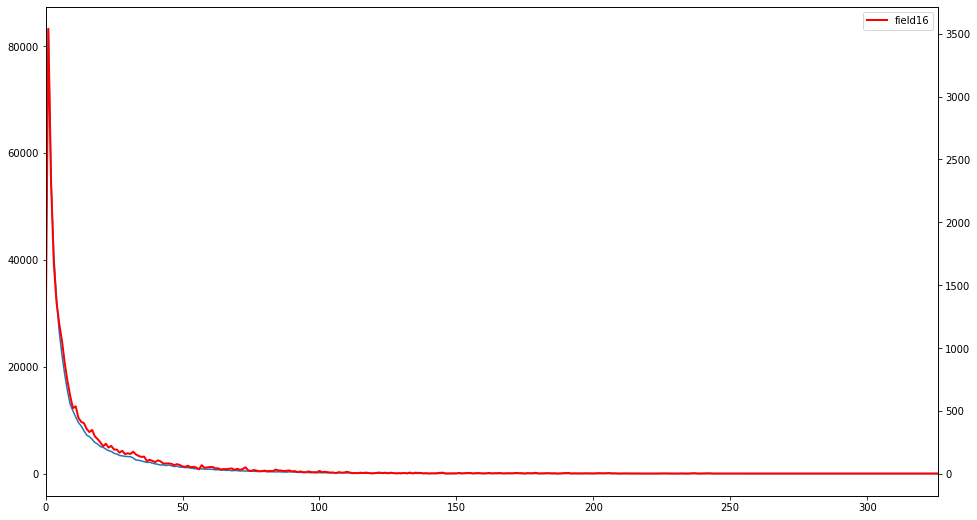

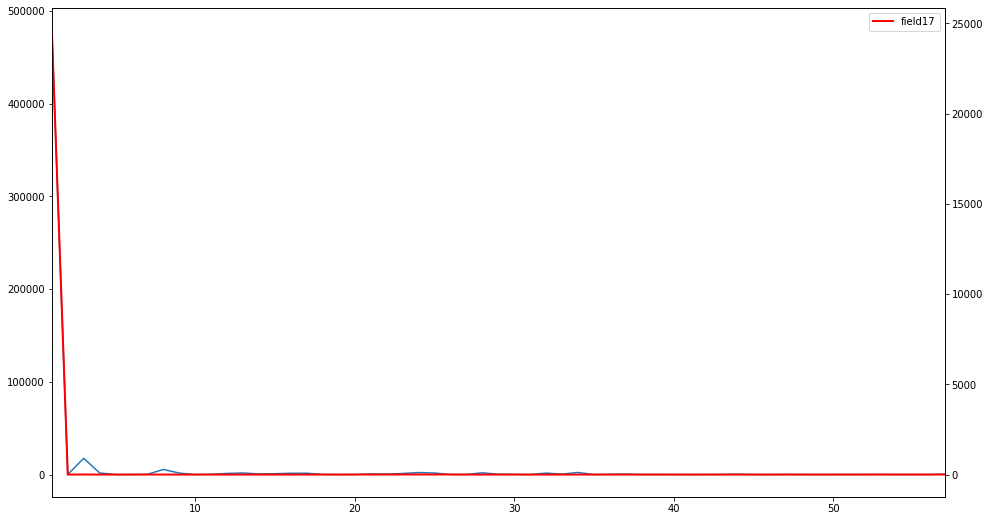

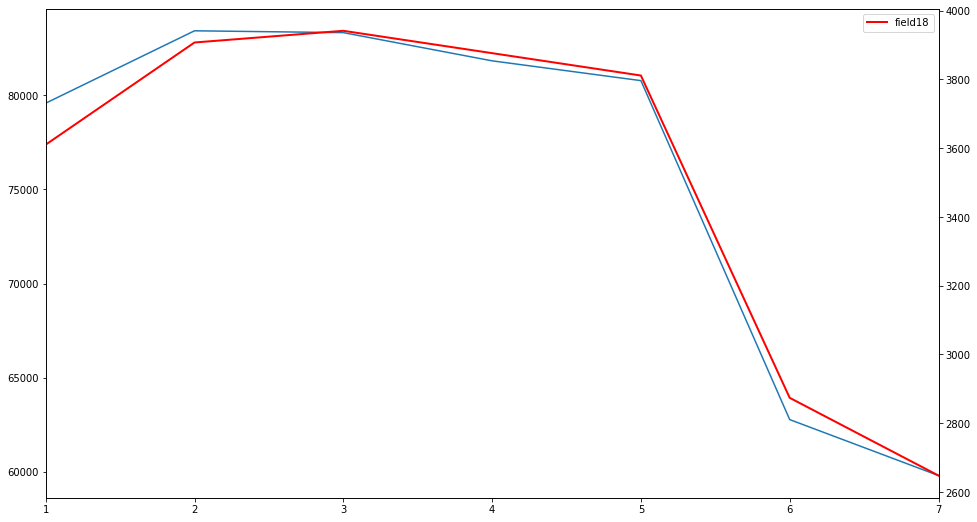

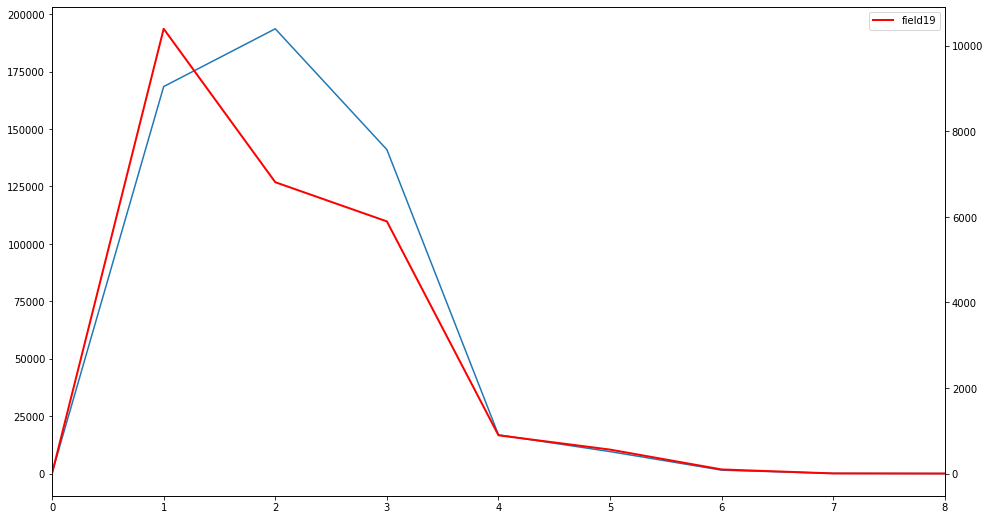

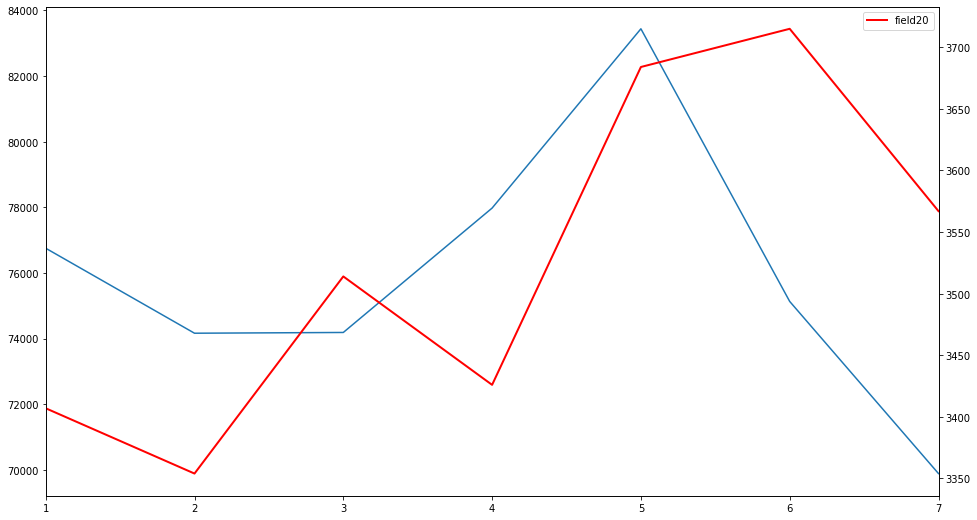

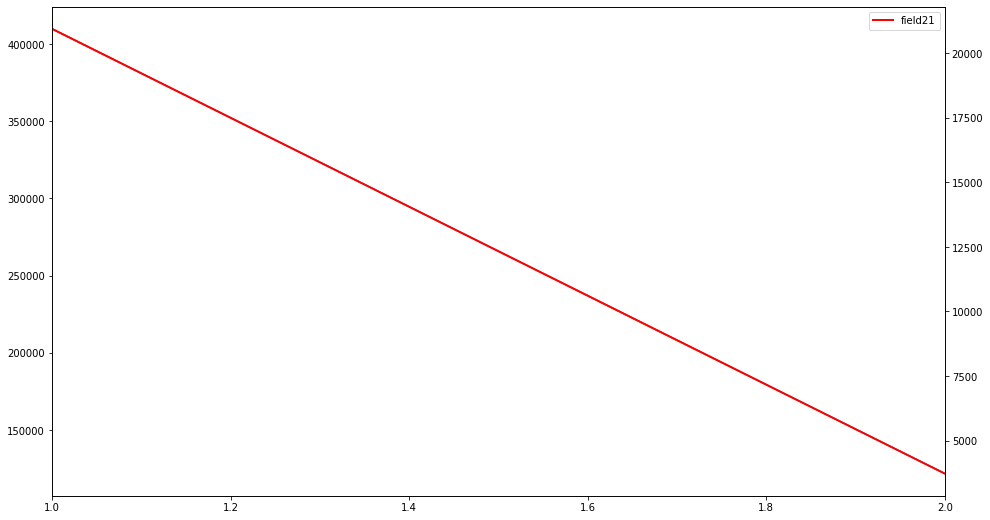

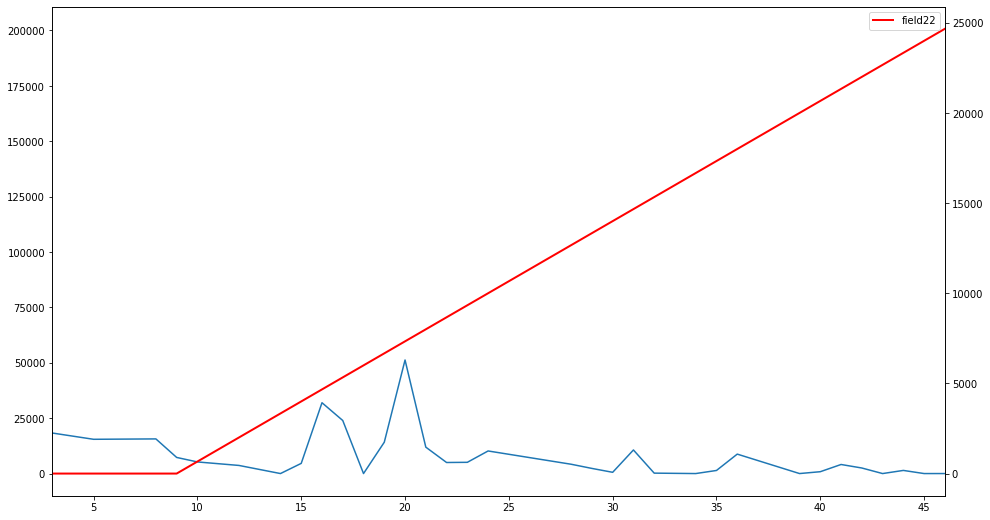

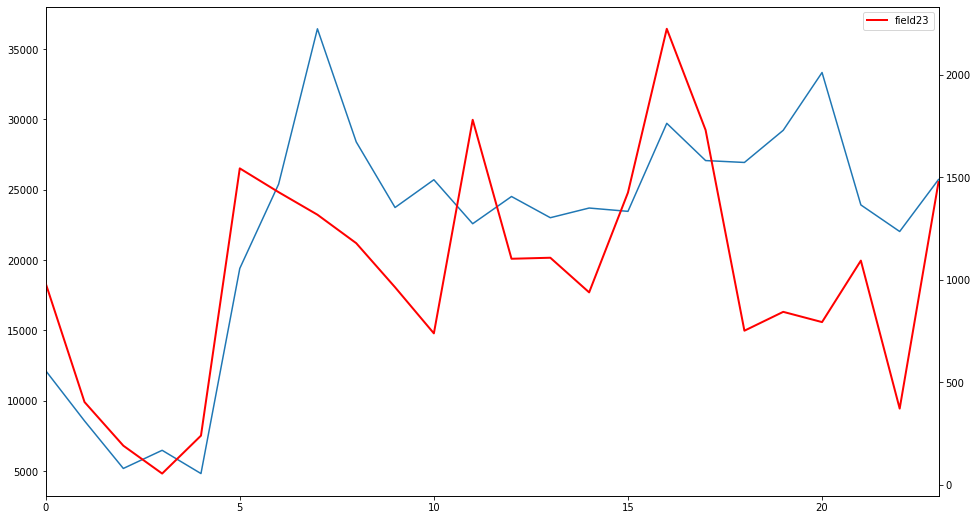

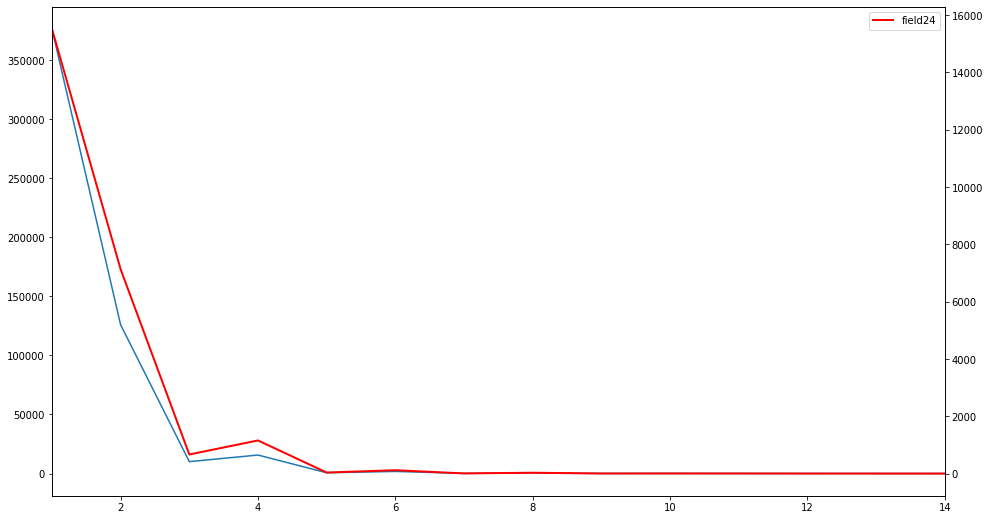

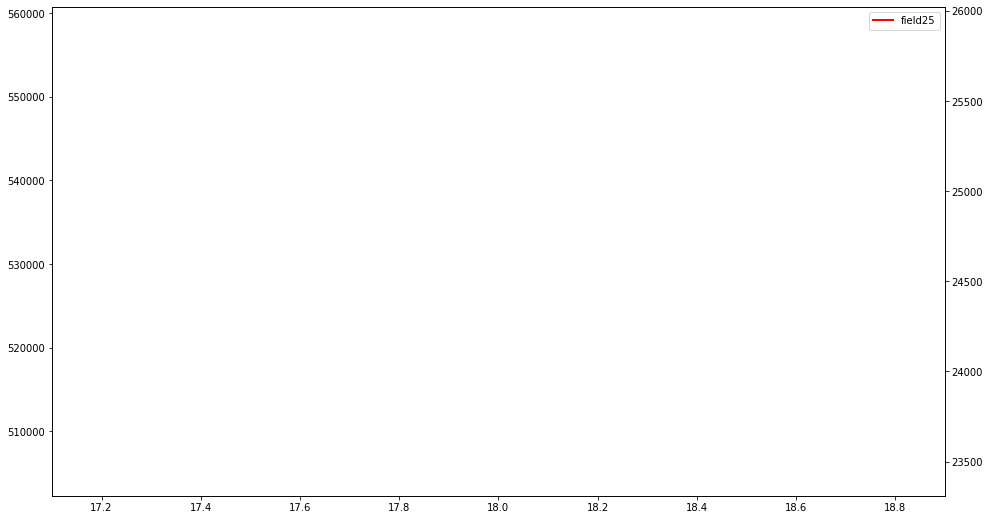

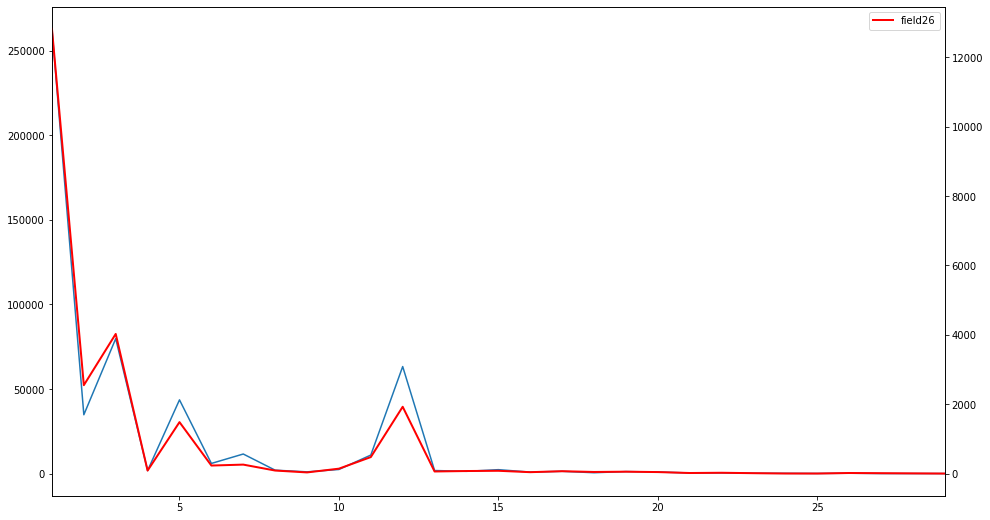

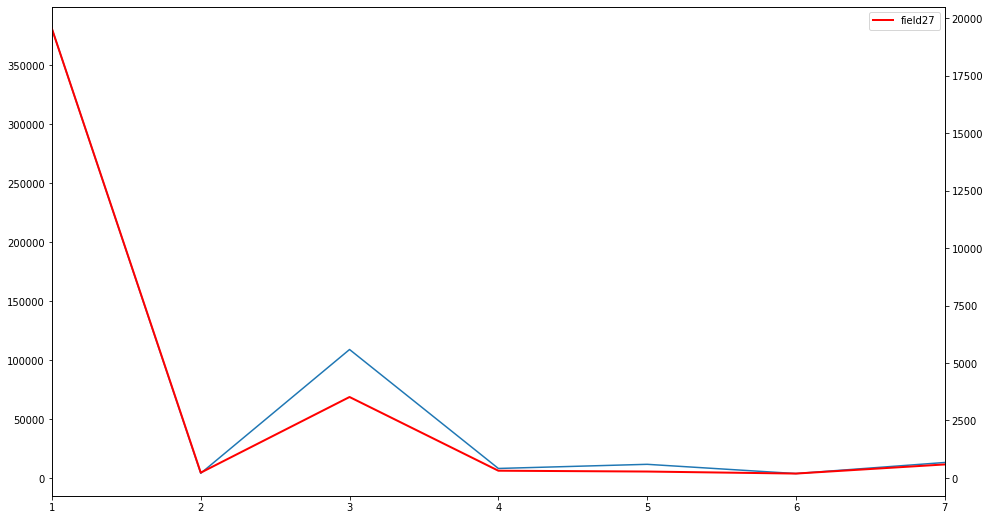

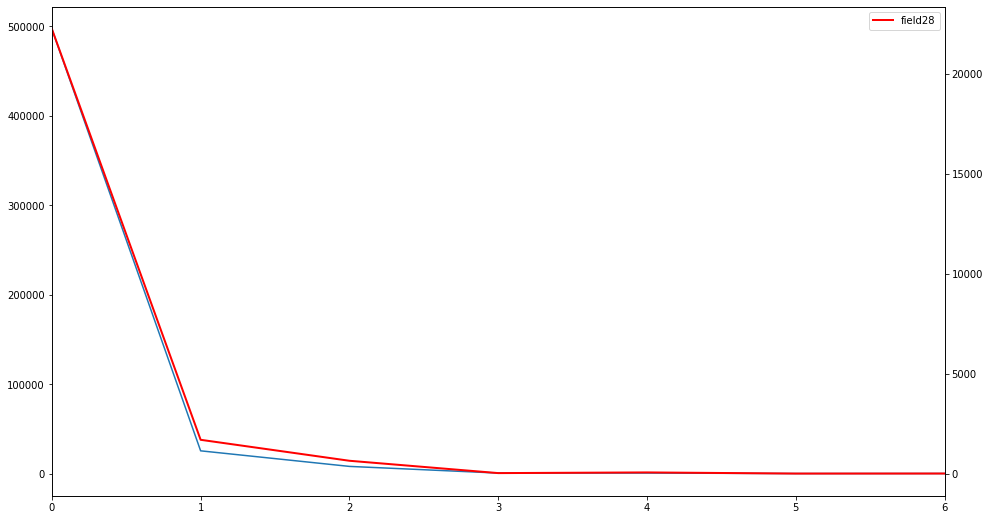

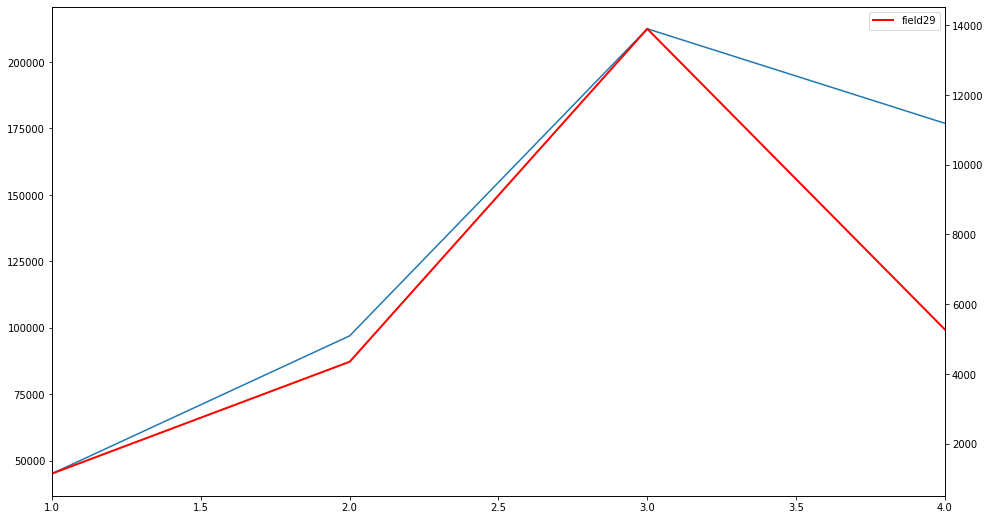

In [25]:
# target = 'field22'
for f in [f'field{i}' for i in range(0,30)]:
    plt.figure(figsize=(16,9))
    ax=data1[f].value_counts().sort_index().plot()
#     ax=data.groupby(f)[target].agg('mean').plot()
    ax2=ax.twinx()
    ax2=data18[f].value_counts().sort_index().plot(color='red', linewidth=2)
    plt.legend()
#     ax=data_one_way_only.groupby(f)[target].agg('mean').plot()

#     ax2 = data.groupby(f)[target].agg('count').plot(color='red', linewidth=2)

In [45]:
data.field16.mean()

15.631981040353757

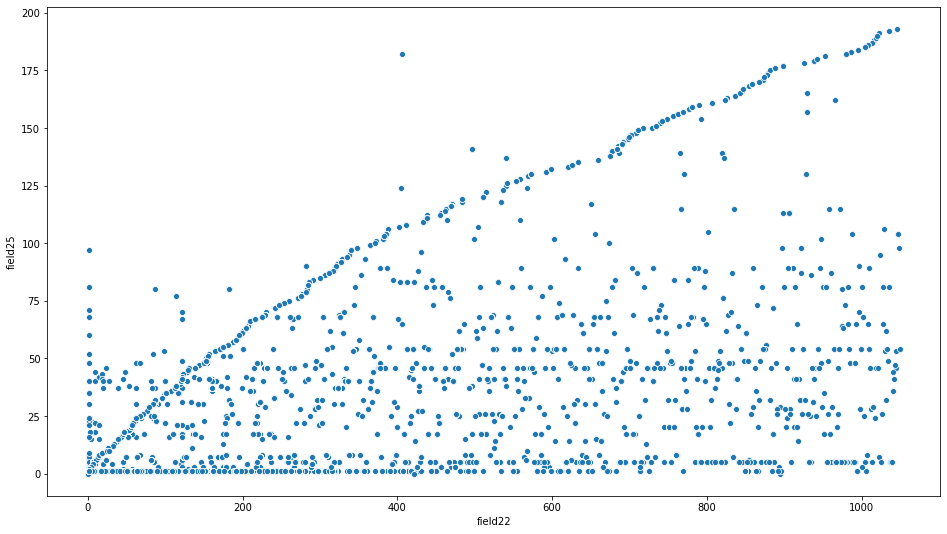

In [68]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=data, x='field22', y='field25')

In [70]:
cut = data[(data['field25'] > 175)&(data['field22'] > 900)]

In [79]:
cut[[x for x in cut.columns if 'field' in x]]

,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,...,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29
21920,79,-0.083509,7,9,4,0,0,2,1,0,...,6,2,980,8,2,182,3,1,0,3
23086,0,2.786632,7,3,1,1,7,2,1,0,...,5,1,953,18,2,181,1,1,0,3
25687,0,3.252060,10,10,1,1,1,2,1,0,...,1,1,1016,14,1,188,12,3,0,4
35622,0,11.629767,10,7,1,1,8,2,0,0,...,2,1,1013,11,2,187,1,1,0,4
75269,0,0.226777,6,6,1,1,1,2,1,0,...,3,1,938,12,1,179,2,1,0,2
133007,0,4.648344,9,11,1,1,1,2,1,0,...,4,1,1005,12,1,185,3,1,0,3
147688,5,2.010918,2,3,4,0,0,2,1,0,...,6,2,1008,6,1,186,12,3,0,1
185578,0,-0.005937,7,7,1,1,3,2,0,0,...,6,1,1046,1,2,193,5,3,1,3
191519,116,1.080062,6,7,6,0,91,2,1,0,...,2,2,1008,19,2,186,12,3,0,2
198428,199,-0.238651,4,5,2,0,0,2,1,0,...,6,2,995,2,1,184,12,3,0,2


In [27]:
for month in range(1,13):
    print('----------   ',month)
    print(data[data['field3']==month]['field16'].value_counts().iloc[:5])

----------    1
1    3155
2    2211
3    1678
4    1533
0    1344
Name: field16, dtype: int64
----------    2
1    2979
2    1814
3    1201
0    1170
4    1009
Name: field16, dtype: int64
----------    3
1    3237
2    2037
3    1427
0    1314
4    1108
Name: field16, dtype: int64
----------    4
1    3115
2    1878
3    1361
0    1244
4    1096
Name: field16, dtype: int64
----------    5
1    2718
2    1598
3    1191
0    1031
4     901
Name: field16, dtype: int64
----------    6
1    10404
2     7317
3     5472
4     4099
0     3895
Name: field16, dtype: int64
----------    7
1    12922
2     9164
3     7476
4     6297
5     5193
Name: field16, dtype: int64
----------    8
1    12238
2     8375
3     6279
4     5087
5     4189
Name: field16, dtype: int64
----------    9
1    11429
2     7668
3     5715
4     4607
0     4358
Name: field16, dtype: int64
----------    10
1    12295
2     7946
3     6092
4     4946
0     4935
Name: field16, dtype: int64
----------    11
1    11673
2     

In [14]:
top_places = [4,5,8,9,3,2]

No handles with labels found to put in legend.


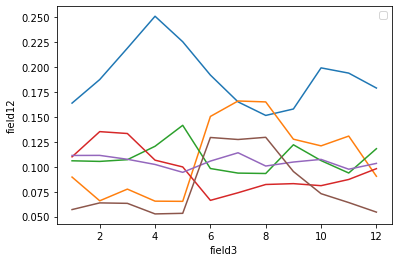

In [21]:
flights_by_month = data.groupby('field3')['field12'].agg('count')
for place in top_places:
#     place=4
    place_stat=     data[data['field12']==place].groupby('field3')['field12'].agg('count') / flights_by_month
    sns.lineplot(y=place_stat,x=place_stat.index)
plt.legend()

In [19]:
place_stat

field3
1     0.163793
2     0.187408
3     0.218876
4     0.250898
5     0.225334
6     0.191924
7     0.165025
8     0.151443
9     0.157896
10    0.199139
11    0.193869
12    0.178917
Name: field12, dtype: float64

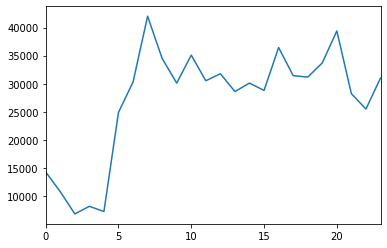

In [24]:
data['field23'].value_counts().sort_index().plot()

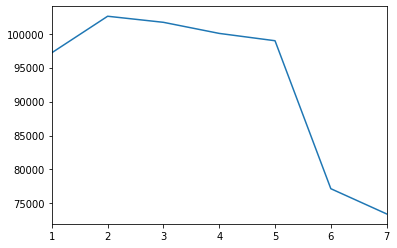

In [26]:
data['field18'].value_counts().sort_index().plot()

In [63]:
data[data['field12']==place].groupby('field3')['field12'].agg('count')#.plot()

field3
1      2174
2      1215
3      1242
4       968
5       936
6      7069
7     11581
8     11988
9      8112
10     5761
11     4325
12     3736
Name: field12, dtype: int64

field3
1     38109
2     19060
3     19623
4     18370
5     17565
6     54657
7     90962
8     92563
9     85189
10    78935
11    67494
12    68540
Name: field12, dtype: int64